In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

In [6]:
gauss_coef = pd.read_csv('gauss_coefs.dat', skiprows=2, delim_whitespace=True, dtype='float')

In [7]:
gauss_coef

,t_step,time,h1_1,g1_0,g1_1,h2_2,h2_1,g2_0,g2_1,g2_2,h3_3,h3_2,h3_1,g3_0,g3_1,g3_2,g3_3
0,2500100.0,1.25005,-0.000081,0.020612,-0.000066,0.000204,-0.000036,-0.000063,-0.000363,0.000167,0.000025,0.000072,-0.000061,-0.000537,-0.000018,0.000103,0.000067
1,2500200.0,1.25010,-0.000081,0.020611,-0.000066,0.000204,-0.000034,-0.000064,-0.000361,0.000167,0.000025,0.000071,-0.000061,-0.000537,-0.000017,0.000103,0.000067
2,2500300.0,1.25015,-0.000080,0.020610,-0.000066,0.000203,-0.000032,-0.000065,-0.000360,0.000167,0.000025,0.000070,-0.000061,-0.000537,-0.000017,0.000102,0.000067
3,2500400.0,1.25020,-0.000080,0.020610,-0.000066,0.000203,-0.000030,-0.000066,-0.000358,0.000167,0.000025,0.000069,-0.000061,-0.000537,-0.000016,0.000102,0.000067
4,2500500.0,1.25025,-0.000080,0.020609,-0.000065,0.000203,-0.000029,-0.000066,-0.000357,0.000167,0.000025,0.000068,-0.000061,-0.000537,-0.000015,0.000101,0.000066
5,2500600.0,1.25030,-0.000080,0.020609,-0.000065,0.000202,-0.000028,-0.000067,-0.000355,0.000167,0.000025,0.000067,-0.000061,-0.000537,-0.000015,0.000101,0.000066
6,2500700.0,1.25035,-0.000079,0.020608,-0.000065,0.000202,-0.000027,-0.000068,-0.000353,0.000167,0.000026,0.000066,-0.000061,-0.000537,-0.000014,0.000101,0.000066
7,2500800.0,1.25040,-0.000079,0.020608,-0.000065,0.000201,-0.000026,-0.000069,-0.000351,0.000167,0.000026,0.000064,-0.000062,-0.000537,-0.000014,0.000100,0.000066
8,2500900.0,1.25045,-0.000079,0.020607,-0.000065,0.000201,-0.000026,-0.000069,-0.000349,0.000167,0.000026,0.000063,-0.000062,-0.000536,-0.000013,0.000100,0.000066
9,2501000.0,1.25050,-0.000079,0.020608,-0.000065,0.000201,-0.000026,-0.000070,-0.000347,0.000167,0.000026,0.000062,-0.000062,-0.000536,-0.000013,0.000100,0.000066


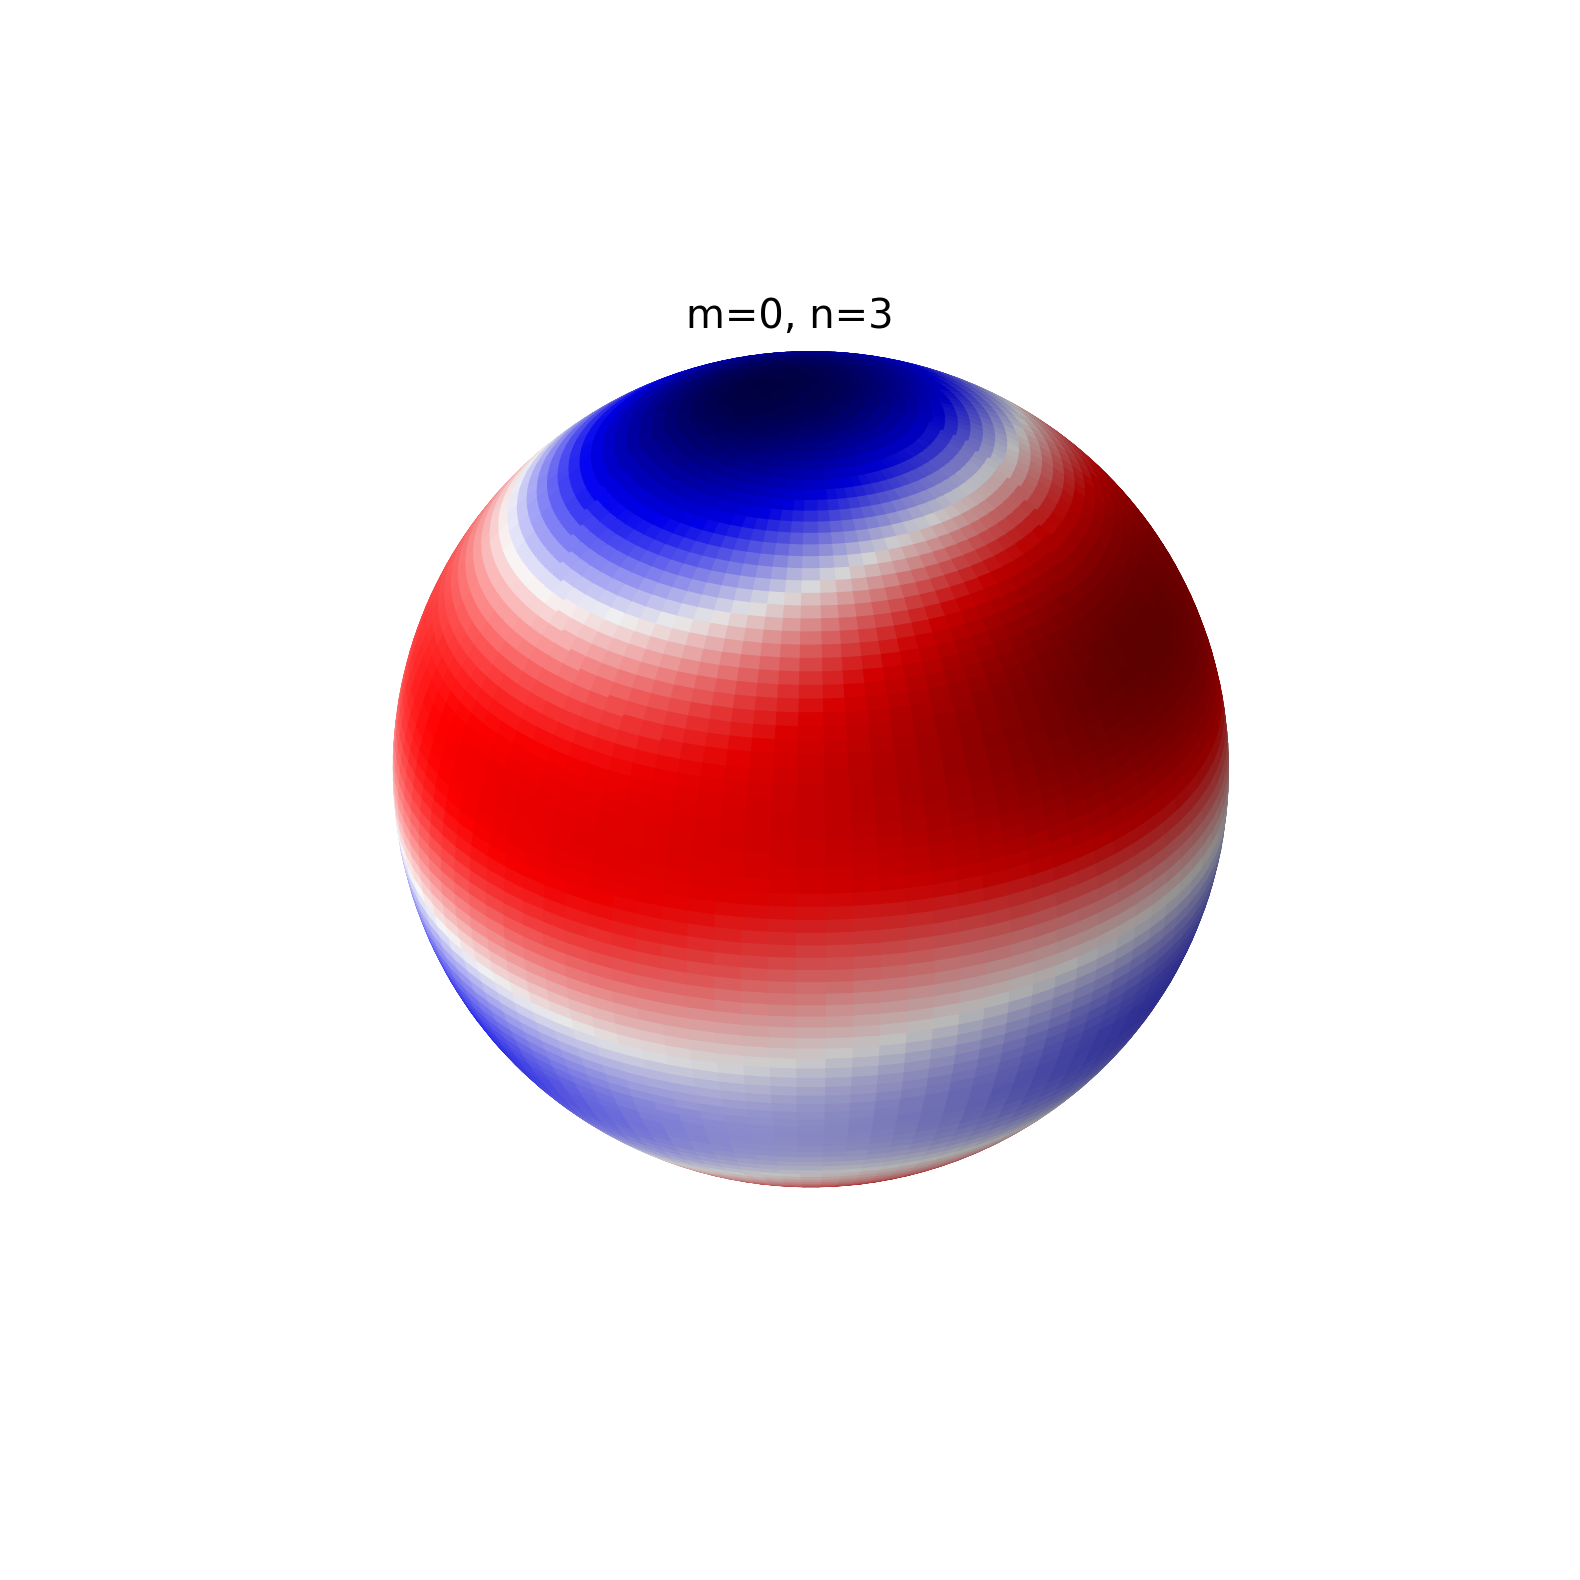

In [57]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

try:
    del fcolors
except:
    pass

for (l, m) in [(1, 1), (2, 2), (2, 1), (2, 0), (3, 3), (3, 2), (3, 1), (3, 0)]:#, (1, 0)
    g_coef = gauss_coef['g{0}_{1}'.format(l, m)].tolist()
    try:
        h_coef = gauss_coef['h{0}_{1}'.format(l, m)].tolist()
    except:
        h_coef = [0]*len(g_coef)
    try:
        fcolors += (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
    except:
        fcolors = (g_coef[0]*np.cos(m*phi)+h_coef[0]*np.sin(m*phi))*sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.title('m={0}, n={1}'.format(m,l), fontsize='x-large', position=(0.5,0.86))
plt.tight_layout()
# plt.savefig('sph_harm_m{0}_n{1}.pdf'.format(m,l))
plt.show()

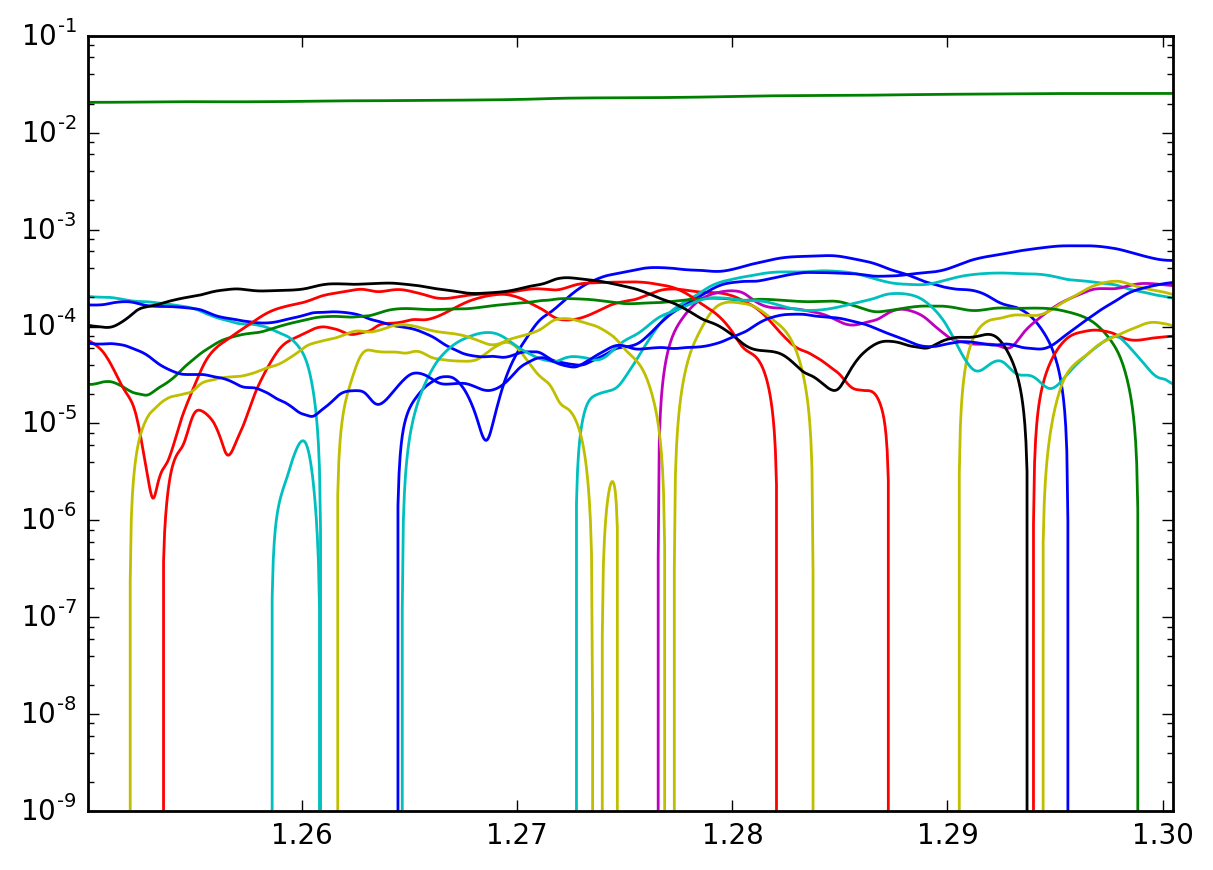

In [26]:
plt.figure(figsize=(7,5))
for column in gauss_coef.columns[2:].tolist():
    plt.plot(gauss_coef.time.tolist(), gauss_coef[column].tolist(), label=column)
# plt.legend()
plt.yscale('log')
plt.xlim(gauss_coef.time.min(), gauss_coef.time.max())
plt.show()

In [17]:
gauss_coef['time'].tolist()

[1.25004999999778,
 1.25009999999778,
 1.25014999999779,
 1.2501999999978,
 1.25024999999781,
 1.2502999999978102,
 1.25034999999782,
 1.2503999999978301,
 1.25044999999783,
 1.2504999999978401,
 1.25054999999785,
 1.25059999999785,
 1.25064999999786,
 1.25069999999787,
 1.25074999999788,
 1.2507999999978798,
 1.25084999999789,
 1.2508999999978998,
 1.2509499999979,
 1.25099999999791,
 1.2510499999979199,
 1.25109999999792,
 1.2511499999979299,
 1.25119999999794,
 1.2512499999979498,
 1.25129999999795,
 1.25134999999796,
 1.25139999999797,
 1.25144999999797,
 1.25149999999798,
 1.25154999999799,
 1.2515999999979899,
 1.251649999998,
 1.2516999999980098,
 1.2517499999980202,
 1.25179999999802,
 1.2518499999980301,
 1.25189999999804,
 1.2519499999980401,
 1.25199999999805,
 1.25204999999806,
 1.25209999999806,
 1.25214999999807,
 1.2521999999980802,
 1.25224999999809,
 1.2522999999980902,
 1.2523499999981,
 1.2523999999981101,
 1.25244999999811,
 1.2524999999981201,
 1.25254999999813,
 1